In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_feature_imp_cancer_up(model, feature_num, feature_names):
  n_features = feature_num    # feature(변수의 개수)
  imp = model.feature_importances_     # feature의 중요도 
  plt.barh(range(n_features) , imp, align='center')  # 그래프(가로 막대 그래프)
  plt.yticks(np.arange(n_features), feature_names)  #y축의 축의 값
  plt.xlabel("feature importance")   # x축 레이블(제목)
  plt.ylabel("feature")              # y축 제목
  plt.ylim(-1, n_features)           # y축의 범위 지정 

In [3]:
from sklearn.ensemble import GradientBoostingClassifier

In [4]:
cancer = load_breast_cancer()

### 01. X, y로 데이터 나누기

In [9]:
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### 02. GradientBoostingClassifier 모델 만들기

In [6]:
model = GradientBoostingClassifier(random_state=0)

### 03. 학습

In [7]:
model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

### 04. 정확도 확인 model.score()

In [8]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
0.958041958041958


In [11]:
model.fit   # 기본적으로 트리의 깊이는 3, 트리의 갯수는 100개

<bound method BaseGradientBoosting.fit of GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)>

### max_depth (트리의 깊이) 조정

In [10]:
for i in range(1,7):
    gbrt = GradientBoostingClassifier(random_state=0, max_depth=i)
    gbrt.fit(X_train, y_train)
    
    print('tree depth : {}' .format(i))
    print(gbrt.score(X_train, y_train))
    print(gbrt.score(X_test, y_test))

tree depth : 1
0.9906103286384976
0.972027972027972
tree depth : 2
1.0
0.972027972027972
tree depth : 3
1.0
0.958041958041958
tree depth : 4
1.0
0.958041958041958
tree depth : 5
1.0
0.9020979020979021
tree depth : 6
1.0
0.9440559440559441


### learning_rate (트리의 학습율) 조정

In [12]:
l_rate = [0.001, 0.005, 0.007, 0.01, 0.05, 0.07, 0.09]

for i in l_rate:
    gbrt = GradientBoostingClassifier(random_state=0, max_depth=2, learning_rate=i)
    gbrt.fit(X_train, y_train)
    
    print('learning rate : {}' .format(i))
    print(gbrt.score(X_train, y_train))
    print(gbrt.score(X_test, y_test))

learning rate : 0.001
0.6267605633802817
0.6293706293706294
learning rate : 0.005
0.9577464788732394
0.951048951048951
learning rate : 0.007
0.9765258215962441
0.958041958041958
learning rate : 0.01
0.9741784037558685
0.965034965034965
learning rate : 0.05
0.9953051643192489
0.958041958041958
learning rate : 0.07
1.0
0.965034965034965
learning rate : 0.09
1.0
0.972027972027972


### depth=2, learning rate=0.09 일 때 BEST

In [13]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=2, learning_rate=0.09)
gbrt.fit(X_train, y_train)

print(gbrt.score(X_train, y_train))
print(gbrt.score(X_test, y_test))

1.0
0.972027972027972


### 변수의 중요도

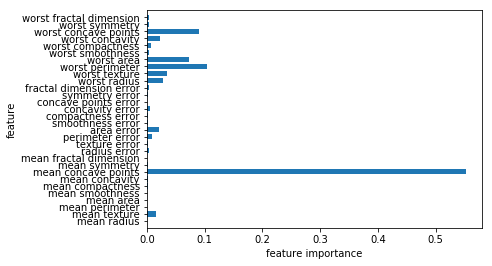

In [16]:
feature_n = X.shape[1]
feature_names = cancer.feature_names
plot_feature_imp_cancer_up(model, feature_n, feature_names)